In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for sustainable projects (Class 0)
sustainable_energy = np.random.normal(loc=100, scale=10, size=(100, 1))  # Energy output (kWh)
carbon_reduction = np.random.normal(loc=50, scale=5, size=(100, 1))  # Carbon reduction (tons)
sustainable = np.hstack((sustainable_energy, carbon_reduction))

# Generate data for non-sustainable projects (Class 1)
non_sustainable_energy = np.random.normal(loc=70, scale=15, size=(100, 1))  # Energy output (kWh)
carbon_emission_increase = np.random.normal(loc=10, scale=3, size=(100, 1))  # Carbon increase (tons)
non_sustainable = np.hstack((non_sustainable_energy, carbon_emission_increase))

# Combine data and labels
X_energy = np.vstack((sustainable, non_sustainable))
y_energy = np.hstack((np.zeros(100), np.ones(100)))  # Class 0: Sustainable, Class 1: Non-Sustainable

# Create a DataFrame
data = pd.DataFrame(X_energy, columns=["Energy Output (kWh)", "Carbon Reduction (tons)"])
data["Label"] = y_energy  # Add labels

# Export the DataFrame to a CSV file
csv_file_path = "renewable_energy_dataset.csv"
data.to_csv(csv_file_path, index=False)
print(f"Dataset exported successfully to: {csv_file_path}")


#Re-upload
# Import necessary libraries
import pandas as pd

# Upload the CSV file from your PC
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
data = pd.read_csv("renewable_energy_dataset.csv")
print(data.head())

# Summary of the dataset
print("\nDataset Summary:")
print(data.describe())

Dataset exported successfully to: renewable_energy_dataset.csv


Saving renewable_energy_dataset.csv to renewable_energy_dataset (1).csv
   Energy Output (kWh)  Carbon Reduction (tons)  Label
0           104.967142                42.923146    0.0
1            98.617357                47.896773    0.0
2           106.476885                48.286427    0.0
3           115.230299                45.988614    0.0
4            97.658466                49.193571    0.0

Dataset Summary:
       Energy Output (kWh)  Carbon Reduction (tons)       Label
count           200.000000               200.000000  200.000000
mean             84.967489                30.216022    0.500000
std              19.221000                20.313325    0.501255
min              21.380990                 3.628313    0.000000
25%              71.584098                10.188943    0.000000
50%              87.240470                28.487776    0.500000
75%             100.207171                50.381675    1.000000
max             127.790972                63.600846    1.000000


In [3]:
#Data Preprocessing (scaling and splitting)
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and labels (y)
X = data[["Energy Output (kWh)", "Carbon Reduction (tons)"]].values
y = data["Label"].values

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)       # Transform test data

print("Data preprocessing complete. Features are now scaled and split into training and testing sets.")

Data preprocessing complete. Features are now scaled and split into training and testing sets.


In [4]:
#Training SVM Models
from sklearn.svm import SVC

# Define SVM models with different kernels
kernels = {
    "Linear Kernel": SVC(kernel="linear", C=1),
    "Polynomial Kernel (Degree=3)": SVC(kernel="poly", degree=3, C=1),
    "RBF Kernel": SVC(kernel="rbf", gamma=0.5, C=1)
}

# Train models
models = {name: model.fit(X_train, y_train) for name, model in kernels.items()}
print("SVM models trained successfully with Linear, Polynomial, and RBF kernels.")

SVM models trained successfully with Linear, Polynomial, and RBF kernels.


In [5]:
# Evaluating Model Performance
from sklearn.metrics import classification_report, accuracy_score

print("Evaluation Metrics for Each Kernel:\n")
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.2f}")

    # Compute precision, recall, and F1-score
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Sustainable", "Non-Sustainable"]))
    print("-" * 50)

Evaluation Metrics for Each Kernel:

Linear Kernel:
Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Sustainable       1.00      1.00      1.00        31
Non-Sustainable       1.00      1.00      1.00        29

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

--------------------------------------------------
Polynomial Kernel (Degree=3):
Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Sustainable       1.00      1.00      1.00        31
Non-Sustainable       1.00      1.00      1.00        29

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

--------------------------------------------------
RBF Kernel:
Accuracy: 1.00
Classification Report:


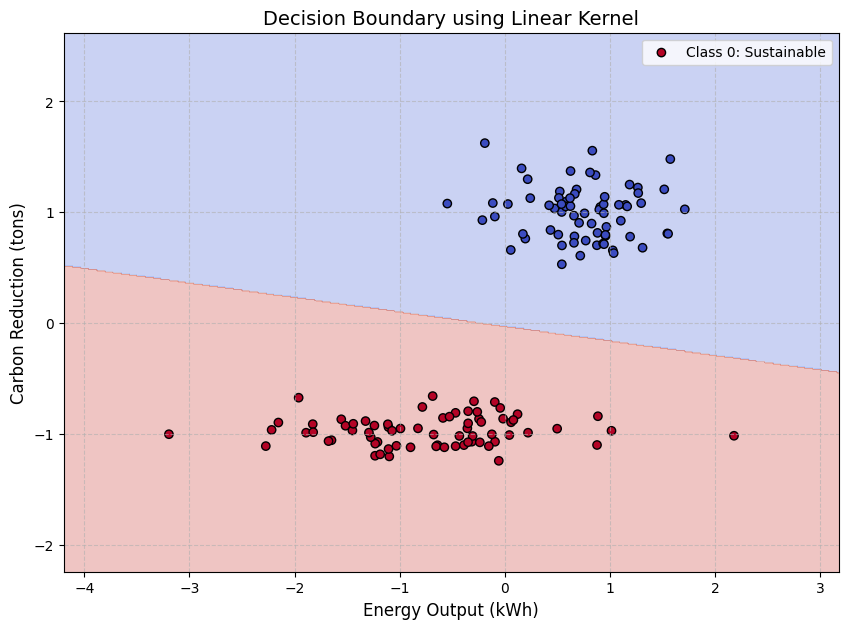

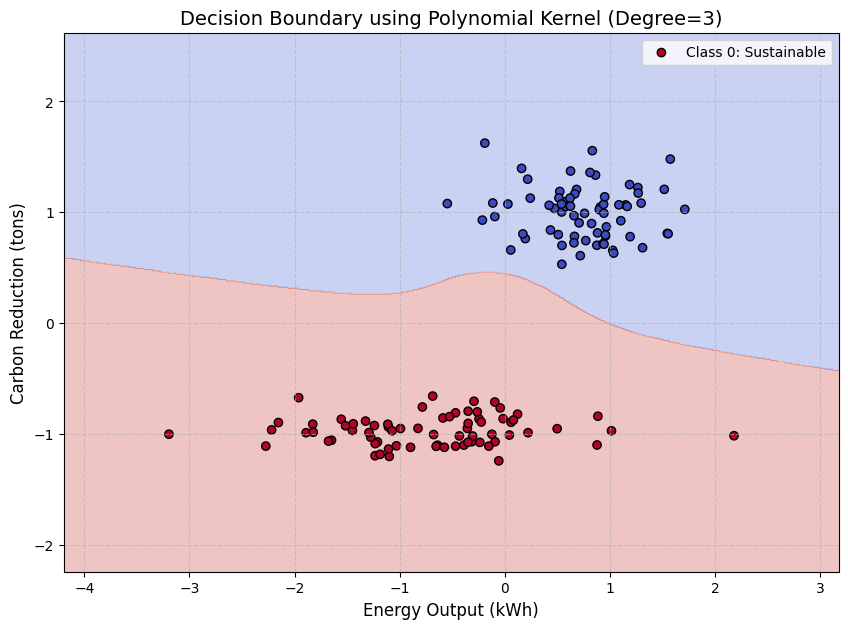

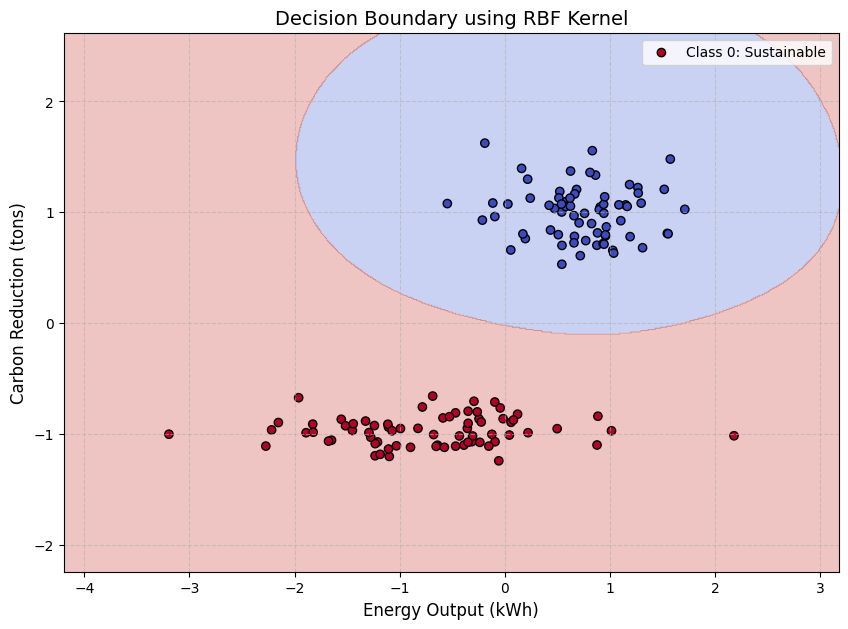

In [6]:
# Visualize Decision Boundaries
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")  # Colorblind-friendly palette
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="coolwarm", label="Data Points")
    plt.title(title, fontsize=14)
    plt.xlabel("Energy Output (kWh)", fontsize=12)
    plt.ylabel("Carbon Reduction (tons)", fontsize=12)
    plt.legend(["Class 0: Sustainable", "Class 1: Non-Sustainable"], fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Plot decision boundaries for each kernel
for name, model in models.items():
    plot_decision_boundary(model, X_train, y_train, f"Decision Boundary using {name}")
